In [ ]:
import math
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
import numpy as np
import pandas as pd 
import os
from google.colab import files

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
   print('User uploaded file «{name}» with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving marketing_data.csv to marketing_data (1).csv
User uploaded file «marketing_data.csv» with length 227054 bytes


In [ ]:
data = pd.read_csv('marketing_data.csv')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND


In [ ]:
data.shape

(2240, 28)

In [ ]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

ID = уникальный идентификатор клиента

Year_Birth = год рождения клиента

Education = уровень образования клиента

Marital_Status = семейное положение клиента

Доход = годовой семейный доход клиента

Kidhome = Количество детей в семье клиента

Teenhome = Количество подростков в семье клиента

Dt_Customer = Дата регистрации клиента в компании

Recency = количество дней с момента последней покупки клиента

MntWines = Сумма, потраченная на вино за последние 2 года

MntFruits = Сумма, потраченная на фрукты за последние 2 года

MntMeatProducts = Сумма, потраченная на мясо за последние 2 года

MntFishProducts = Сумма, потраченная на рыбу за последние 2 года

MntSweetProducts = Сумма, потраченная на сладости за последние 2 года

MntGoldProds = Сумма, потраченная на золото за последние 2 года

NumDealsPurchases = Количество покупок со скидкой

NumWebPurchases = Количество покупок, совершенных через веб-сайт компании.

NumCatalogPurchases = Количество покупок, совершенных с использованием каталога

NumStorePurchases = Количество покупок, совершенных непосредственно в магазинах

NumWebVisitsMonth = Количество посещений веб-сайта компании за последний месяц

AcceptedCmp3 = 1, если покупатель принял предложение в 3-ей кампании, 0 в противном случае

AcceptedCmp4 = 1, если клиент принял предложение в 4-й кампании, 0 в противном случае

AcceptedCmp5 = 1, если клиент принял предложение в 5-й кампании, 0 в противном случае

AcceptedCmp1 = 1, если клиент принял предложение в 1-й кампании, 0 в противном случае

AcceptedCmp2 = 1, если клиент принял предложение во 2-й кампании, 0 в противном случае

Response = 1, если клиент принял предложение в последней кампании, 0 в противном случае.

Complain = 1, если клиент жаловался в течение последних 2 лет, 0 в противном случае

Country = местонахождение клиента

In [ ]:
data.columns = data.columns.str.replace(' ', '')

In [ ]:
data.columns[data.isnull().sum() > 0]

Index(['Income'], dtype='object')

Столбец Income имеет нулевые значения

In [ ]:
data.Income.isnull().sum()

24

In [ ]:
data.Income = data.Income.str.replace('$', '') 
data.Income = data.Income.str.replace(' ', '') 
data.Income = data.Income.str.replace(',', '') 
data['Income'] = data['Income'].astype(float)

Заполним пустые значения средними значениями, будем смотреть на Образование и Страну, предпологая что чем выше уровень образования, тем выше заработная плата, и в разных странах зарплата разная

In [ ]:
print(data['Education'].value_counts())
print(data['Country'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64


Ищем среднее значение дохода, в каждой стране по каждому уровню образования

In [ ]:
grouped = data.groupby(['Country','Education']) 
grouped = grouped.agg(np.mean)
grouped['Income']

Country  Education 
AUS      2n Cycle      45891.500000
         Basic         21158.500000
         Graduation    53554.620253
         Master        51994.896552
         PhD           52770.259259
CA       2n Cycle      47894.166667
         Basic         19648.000000
         Graduation    52751.272727
         Master        54659.142857
         PhD           58944.481481
GER      2n Cycle      43183.000000
         Basic         17306.500000
         Graduation    55840.172414
         Master        53015.263158
         PhD           57845.388889
IND      2n Cycle      50264.850000
         Basic         21058.500000
         Graduation    45209.552632
         Master        48703.333333
         PhD           63737.923077
ME       Graduation    70515.000000
         Master        49912.000000
         PhD           52614.000000
SA       2n Cycle      48190.240000
         Basic         21669.166667
         Graduation    58341.385093
         Master        51309.616667
        

In [ ]:
for i in data.loc[data.Income.isnull()].index:
    data.iloc[i,4] = math.floor(grouped.loc[data.iloc[i][27],data.iloc[i][2]][2])
data.Income.isnull().sum()

0

In [ ]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1988
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

Семейное положение имеет очень много значений, рассмотрим подробнее 

In [ ]:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [ ]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')
data.Marital_Status.value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

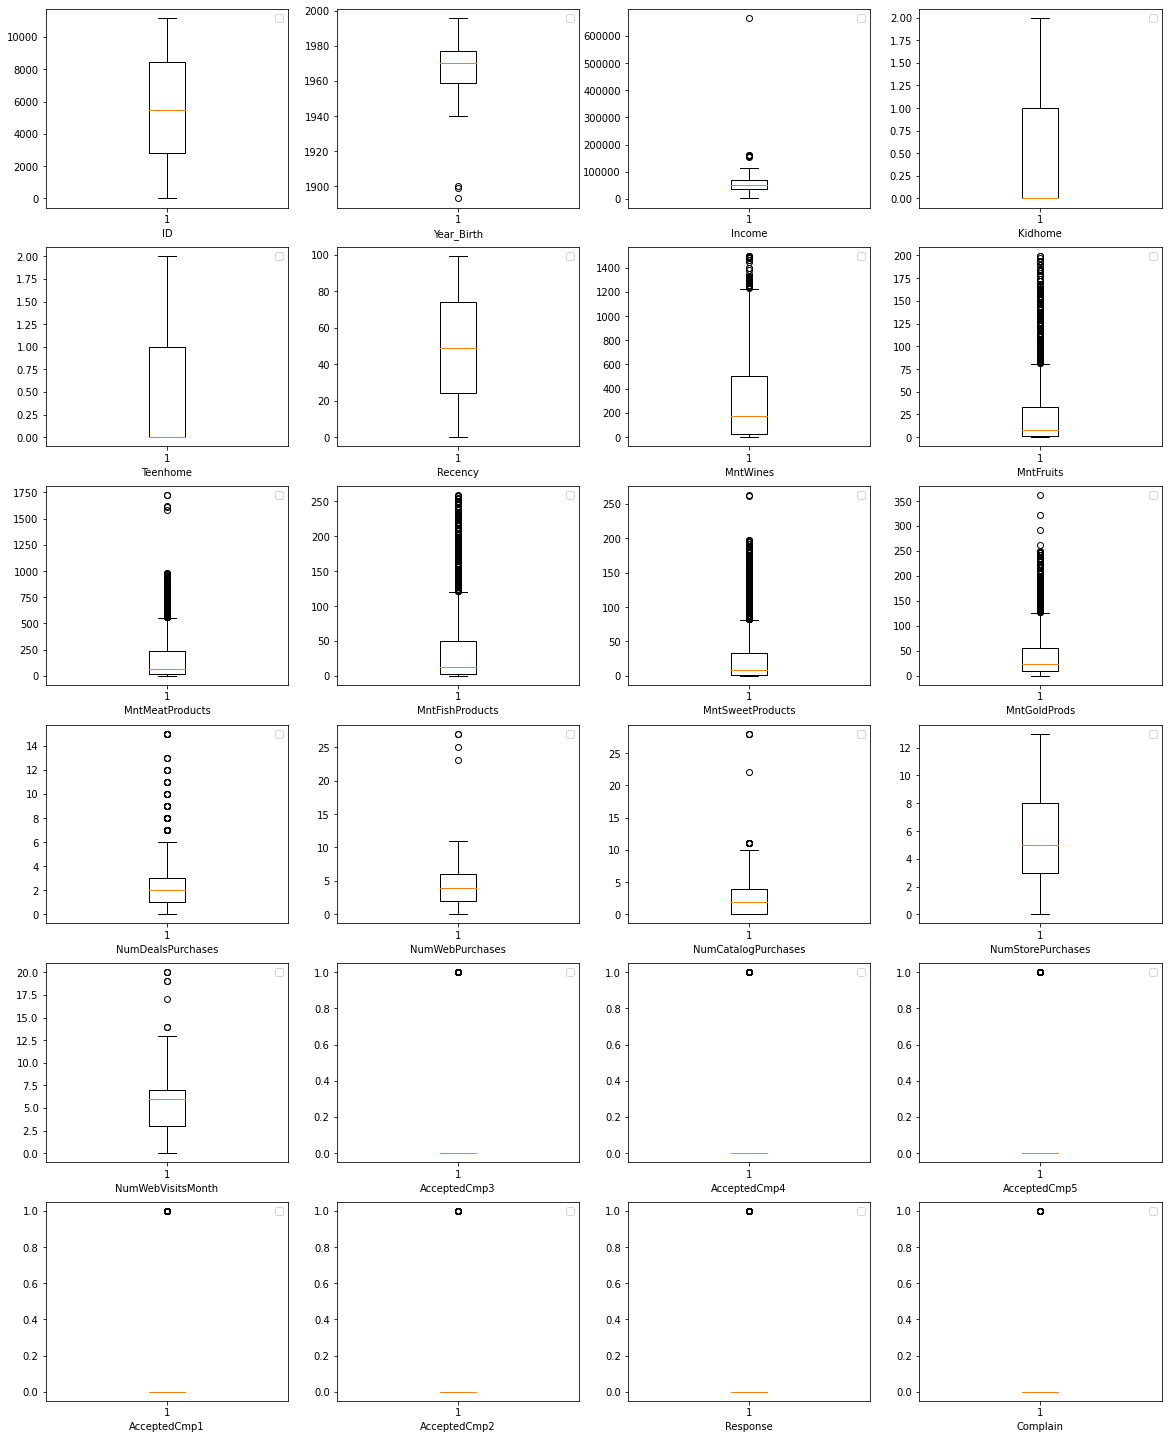

In [ ]:
num_coln = data.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(data[i])
    j=j+1
    plt.xlabel(i)
    plt.legend()
plt.show()

Мы видим что есть выбросы в доходе и в году рождения. Удалим строки, в которых доход превышает 200000 долларов, а год рождения меньше 1920. У других столбцов мы не можем удалить выбросы, поскольку могут быть случаи, когда потребность в продуктах высока для клиента

In [ ]:
data.drop(data[(data['Income']>200000)|(data['Year_Birth']<1920)].index,inplace=True)

Колонку Year_Birth делаем в колонку возраст, чтобы у нас был просто возраст клиента, а не его год рождения

In [ ]:
data.rename(columns = {'Year_Birth':'Age'}, inplace = True)
data['Age'] = data.Age.apply(lambda x: 2021-x)

In [ ]:
purchase_features = [c for c in data.columns if 'Purchase' in str(c)]
purchase_features.remove('NumDealsPurchases')
data['Num_TotalPurchases'] = data[purchase_features].sum(axis = 1)

In [ ]:
data['Childrens'] = data['Kidhome'] + data['Teenhome']

In [ ]:
data['MntTotal'] = np.sum(data.filter(regex='Mnt'), axis=1)

In [ ]:
data_orig = data.copy()

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_auc_score, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression, LinearRegression
import seaborn as sns
from IPython.display import display

С помощью логистической регресии предскажем общее количество покупок, из которых сможем сделать вывод, какие показатели вляют на покупки

In [ ]:
data

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Num_TotalPurchases,Childrens,MntTotal
0,1826,51,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,14,0,1190
1,1,60,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,17,0,577
2,10476,63,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,10,1,251
3,1386,54,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,3,2,11
4,5371,32,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,6,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,45,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,18,1,689
2236,5263,44,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,4,1,55
2237,22,45,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,12,1,309
2238,528,43,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,19,0,1383


In [ ]:
features = data.drop(['ID', 'Num_TotalPurchases', 'Dt_Customer', 'Age', 'Education', 'Marital_Status', 'Country'], axis = 1)
target = data['Num_TotalPurchases']

x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                                  test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1788, 24) (1788,) (448, 24) (448,)


RMSE using Linear reg: 1.283354463839294e-13


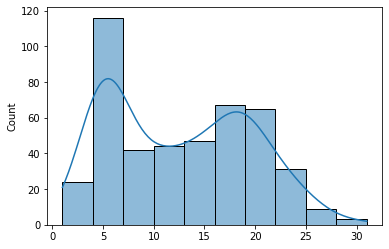

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)
print(f'RMSE using Linear reg: {np.sqrt(mean_squared_error(y_test, predictions))}')

sns.histplot(predictions, kde = True);

In [ ]:
print(f'Avg. Predictions: {np.mean(predictions)}')
print(f'Median Predictions: {np.median(predictions)}')

Avg. Predictions: 12.560267857142863
Median Predictions: 12.000000000000178


 RMSE чрезвычайно мала по сравнению со средним значением целевой переменной, что указывает на хорошие прогнозы модели.

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lin_reg, random_state = 42).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist(), top = 10)

Weight,Feature
0.4554 ± 0.0225,NumStorePurchases
0.3116 ± 0.0127,NumWebPurchases
0.3019 ± 0.0245,NumCatalogPurchases
0 ± 0.0000,MntFruits
0 ± 0.0000,MntMeatProducts
0 ± 0.0000,Recency
0 ± 0.0000,MntFishProducts
0 ± 0.0000,MntGoldProds
0 ± 0.0000,NumDealsPurchases
0 ± 0.0000,MntWines


Как мы можем видеть из таблицы самые важные показатели: количество покупок совершенных в магазине, через интернет и каталог

*   Признаки сверху – наиболее важные, снизу – наименее.
*   Число после ± отражает, как производительность изменялась от одной перестановки к другой.

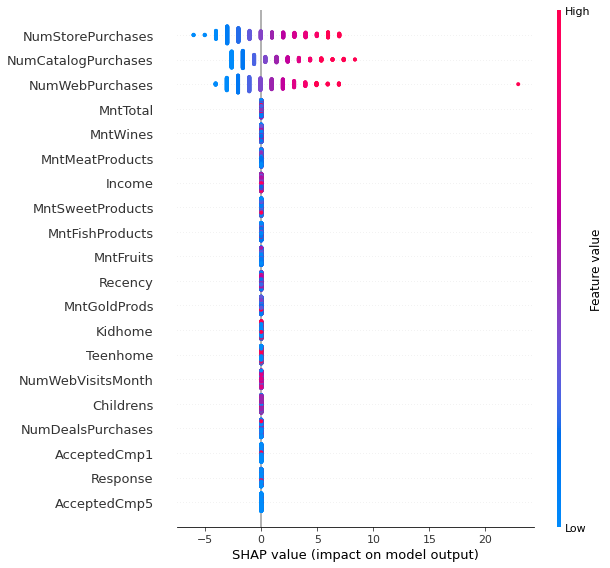

In [ ]:
!pip install shap
import shap

explainer = shap.Explainer(lin_reg, x_train)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)

Покупки в магазине / журнале / Интернет-магазине имеют положительную корреляцию с количеством покупок

Разделим признаки на категориальные и числовые 

In [ ]:
encode_features = ['Education', 'Marital_Status', 'Country']

for c in encode_features:
    lbl = LabelEncoder()
    lbl.fit(list(data[c].astype(str).values))
    data[c] = lbl.transform(list(data[c].astype(str).values))

categorical_features = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
                        'Response', 'Complain']
categorical_features.extend(encode_features)

In [ ]:
numerical_features = [c for c in data.columns if c not in categorical_features]

print(f'Number of Numerical features: {len(numerical_features)}')
print(f'Number of Categorical features: {len(categorical_features)}')

Number of Numerical features: 21
Number of Categorical features: 10


С помощью логистической регресии предскажем общее количество покупок в магазине, из которых сможем сделать вывод, какие показатели вляют на покупки

In [ ]:
features = data.drop(['ID', 'NumStorePurchases', 'Dt_Customer'], axis = 1)
target = data['NumStorePurchases']

x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                                  test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1788, 28) (1788,) (448, 28) (448,)


RMSE using Linear reg: 1.8480494548000015e-14


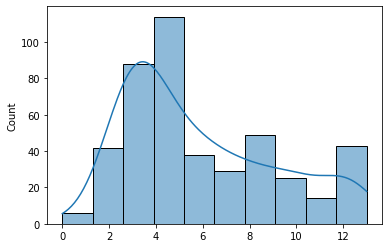

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)
print(f'RMSE using Linear reg: {np.sqrt(mean_squared_error(y_test, predictions))}')

sns.histplot(predictions, kde = True);

In [ ]:
print(f'Avg. Predictions: {np.mean(predictions)}')
print(f'Median Predictions: {np.median(predictions)}')

Avg. Predictions: 5.870535714285716
Median Predictions: 4.999999999999996


RMSE чрезвычайно мала по сравнению со средним значением целевой переменной, что указывает на хорошие прогнозы модели.

In [ ]:
perm = PermutationImportance(lin_reg, random_state = 42).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist(), top = 10)

Weight,Feature
9.3451 ± 0.5851,Num_TotalPurchases
1.3241 ± 0.0715,NumCatalogPurchases
1.3188 ± 0.1859,NumWebPurchases
0 ± 0.0000,Teenhome
0 ± 0.0000,MntGoldProds
0 ± 0.0000,MntFruits
0 ± 0.0000,MntMeatProducts
0 ± 0.0000,MntFishProducts
0 ± 0.0000,MntSweetProducts
0 ± 0.0000,MntTotal


Как мы можем видеть из таблицы самые важные показатели: количество покупок совершенных, через интернет и каталог

*   Признаки сверху – наиболее важные, снизу – наименее.
*   Число после ± отражает, как производительность изменялась от одной перестановки к другой.

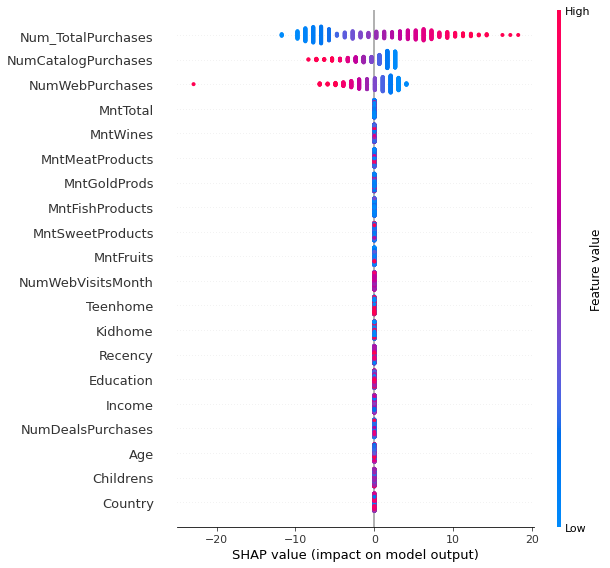

In [ ]:
explainer = shap.Explainer(lin_reg, x_train)
shap_values = explainer(x_test)

shap.summary_plot(shap_values, x_test)


При увеличении покупок по каталогу и в Интернете количество покупок в магазине сокращается

Проверим есть ли связь между регионом и успехом кампаний

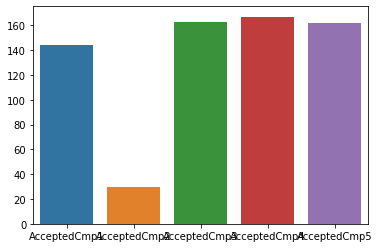

In [ ]:
data_cmp = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].copy()
cmp_success = data_cmp.sum(axis = 0)
cmp_srate = data_cmp.sum(axis = 0) / len(data_cmp) * 100

sns.barplot(x = data_cmp.columns, y = cmp_success.values)

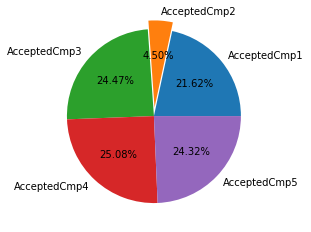

In [ ]:
plt.pie(x = cmp_srate, labels = data_cmp.columns, autopct = '%1.2f%%', shadow = False, explode = [0, 0.1, 0, 0, 0]);


AcceptedCmp2 имеет низкую вероятность успеха, как видно из графиков выше

In [ ]:
data_cmp = data_orig[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                    'Country']].copy()
data_cmp['Total_Accepted'] = data_orig[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                     'AcceptedCmp5']].sum(axis = 1)
data_cmp

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Country,Total_Accepted
0,0,0,0,0,0,SP,0
1,0,1,0,0,0,CA,1
2,0,0,0,0,0,US,0
3,0,0,0,0,0,AUS,0
4,0,0,1,0,0,SP,1
...,...,...,...,...,...,...,...
2235,0,0,0,0,0,US,0
2236,0,0,0,0,0,SP,0
2237,0,0,0,0,0,SP,0
2238,0,0,0,0,0,IND,0


In [ ]:
data_cmp_country = pd.pivot_table(data = data_cmp, index = 'Country', values = 'Total_Accepted', 
                               aggfunc ={'Total_Accepted': ['sum', 'count']})
data_cmp_country['SuccessRate'] = data_cmp_country['sum'] / data_cmp_country['count'] * 100
data_cmp_country.rename(columns = {'count': 'NumCustomers', 'sum': 'NumSuccess'}, inplace = True)
data_cmp_country = data_cmp_country.sort_values(by = 'SuccessRate', ascending = False)
data_cmp_country

,NumCustomers,NumSuccess,SuccessRate
Country,,,
ME,3,1,33.333333
CA,268,87,32.462687
SP,1094,354,32.358318
GER,120,38,31.666667
IND,147,39,26.530612
SA,335,86,25.671642
US,109,26,23.853211
AUS,160,35,21.875000


ME-Мексика имеет самый высокий общий показатель успешности кампании, но имея всего 3 клиента, мы можем игнорировать это

CA-Canada имеет следующий по величине успех

In [ ]:
cm = data_cmp.groupby('Country').agg('mean').sort_values(by = 'Total_Accepted', ascending = False)
cm.style.background_gradient(sns.light_palette('#2ecc71', as_cmap = True))

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Total_Accepted
Country,,,,,,
ME,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
CA,0.067164,0.022388,0.067164,0.089552,0.078358,0.324627
SP,0.071298,0.014625,0.075868,0.081353,0.080439,0.323583
GER,0.058333,0.016667,0.083333,0.091667,0.066667,0.316667
IND,0.047619,0.013605,0.088435,0.074830,0.040816,0.265306
SA,0.059701,0.011940,0.062687,0.059701,0.062687,0.256716
US,0.064220,0.000000,0.073394,0.055046,0.045872,0.238532
AUS,0.043750,0.000000,0.056250,0.037500,0.081250,0.218750


Мы игнорируем данные от Мексики

AcceptedCmp1 хорошо зарекомендовал себя в Испании, Канаде, США

AcceptedCmp2, похоже, не работал ни в одной из стран

AcceptedCmp3 хорошо зарекомендовал себя почти во всех странах

AcceptedCmp4 хорошо зарекомендовал себя в Германии, Канаде, Испании

AcceptedCmp5 имеет хороший успех в Австралии, Испании, Канаде


In [ ]:
import plotly.express as px

In [ ]:
pie2 = data.filter(regex='Mnt').sum().sort_values(ascending=False)
pie2.drop('MntTotal',inplace=True)
pie2 = pd.DataFrame(pie2)
pie2 = pie2.reset_index()
pie2

,index,0
0,MntWines,680029
1,MntMeatProducts,373375
2,MntGoldProds,98346
3,MntFishProducts,83931
4,MntSweetProducts,60552
5,MntFruits,58753


In [ ]:
fig = px.pie(pie2,names='index',values=0, color_discrete_sequence=px.colors.sequential.dense)
fig.show()

Вино - лучший продукт с точки зрения выручки и дохода в расчете на одного покупателя. Это составляет ~ 50% от общей выручки.

In [ ]:
data['Age'].min()

25

Text(0.5, 1.0, 'Unique Count Plot by AgeGroup')

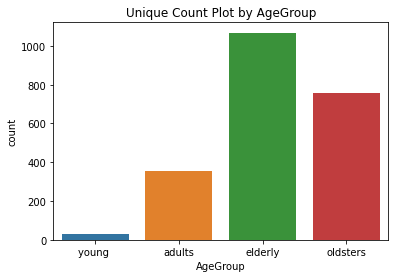

In [ ]:
data_orig['AgeGroup'] = pd.cut(data['Age'], bins = [24, 29, 40, 56, 75], 
                        labels = ['young ', 'adults', 'elderly', 'oldsters'])

sns.countplot(data = data_orig, x = 'AgeGroup');
plt.title('Unique Count Plot by AgeGroup')

In [ ]:
data_cn = pd.pivot_table(data = data_orig, index = 'Country', values = ['MntTotal'], 
                       columns = ['AgeGroup'], aggfunc = ['mean'])
data_cn = data_cn[data_cn.index != 'ME']
data_cn.columns = ['young', 'adults', 'elderly', 'oldsters']
data_cn.T

Country,AUS,CA,GER,IND,SA,SP,US
young,766.333333,928.666667,960.000000,1435.000000,996.000000,762.272727,42.500000
adults,500.000000,728.592593,590.687500,485.176471,632.783333,524.298343,578.842105
elderly,507.202532,536.804348,602.467742,521.956522,539.342105,526.075000,681.340426
oldsters,609.109091,691.562500,662.170732,592.418605,724.069565,732.959128,604.292683


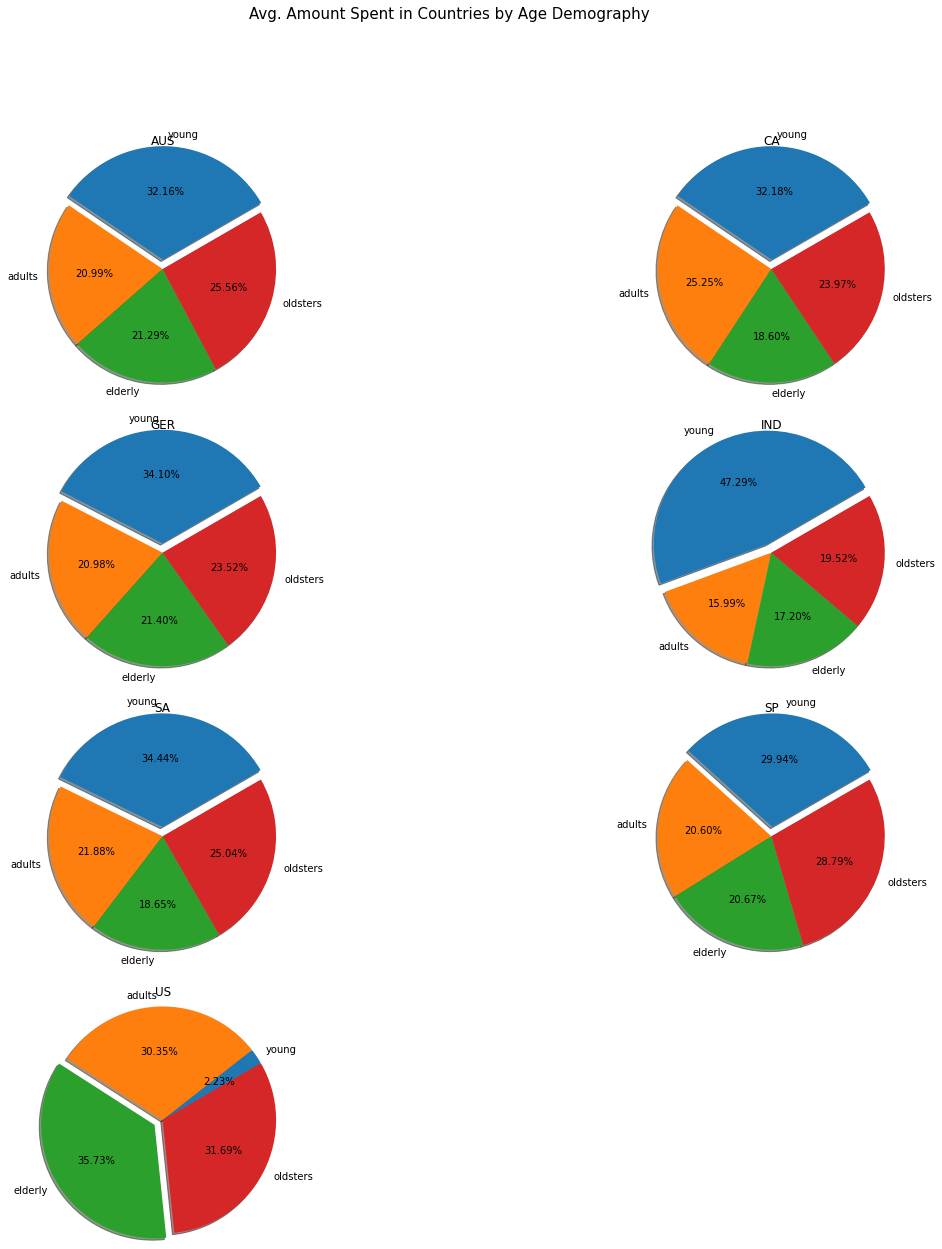

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (20, 20))

for i, (idx, row) in enumerate(data_cn.iterrows()):
    pct = row.values / np.sum(row) * 100
    ax = axes[i // 2, i % 2]
    ax.pie(row, labels = row.index, autopct = '%1.2f%%', radius = 1.2, textprops = {'fontsize': 10}, 
           shadow = True, explode = (pct == max(pct)) * 0.1, startangle = 30)
    ax.set_title(idx)

fig.delaxes(axes[3, 1])
plt.suptitle('Avg. Amount Spent in Countries by Age Demography', fontsize = 15)
plt.show()

In [ ]:
data_orig['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [ ]:
data_cn = pd.pivot_table(data = data_orig, index = 'Country', values = ['MntTotal'], 
                       columns = ['Marital_Status'], aggfunc = ['mean'])
data_cn = data_cn[data_cn.index != 'ME']
data_cn.columns = ['Divorced', 'Married', 'Single', 'Together', 'Widow']
data_cn.T

Country,AUS,CA,GER,IND,SA,SP,US
Divorced,604.600000,502.185185,274.666667,368.222222,691.446809,616.245283,823.000000
Married,686.701493,633.160377,527.844828,578.035088,630.792453,571.509217,524.083333
Single,405.769231,668.968254,710.842105,517.815789,723.275362,570.827731,684.000000
Together,421.292683,629.590909,755.424242,491.794872,542.376238,654.838828,566.250000
Widow,639.833333,693.333333,1053.750000,1075.250000,578.250000,753.069767,526.500000


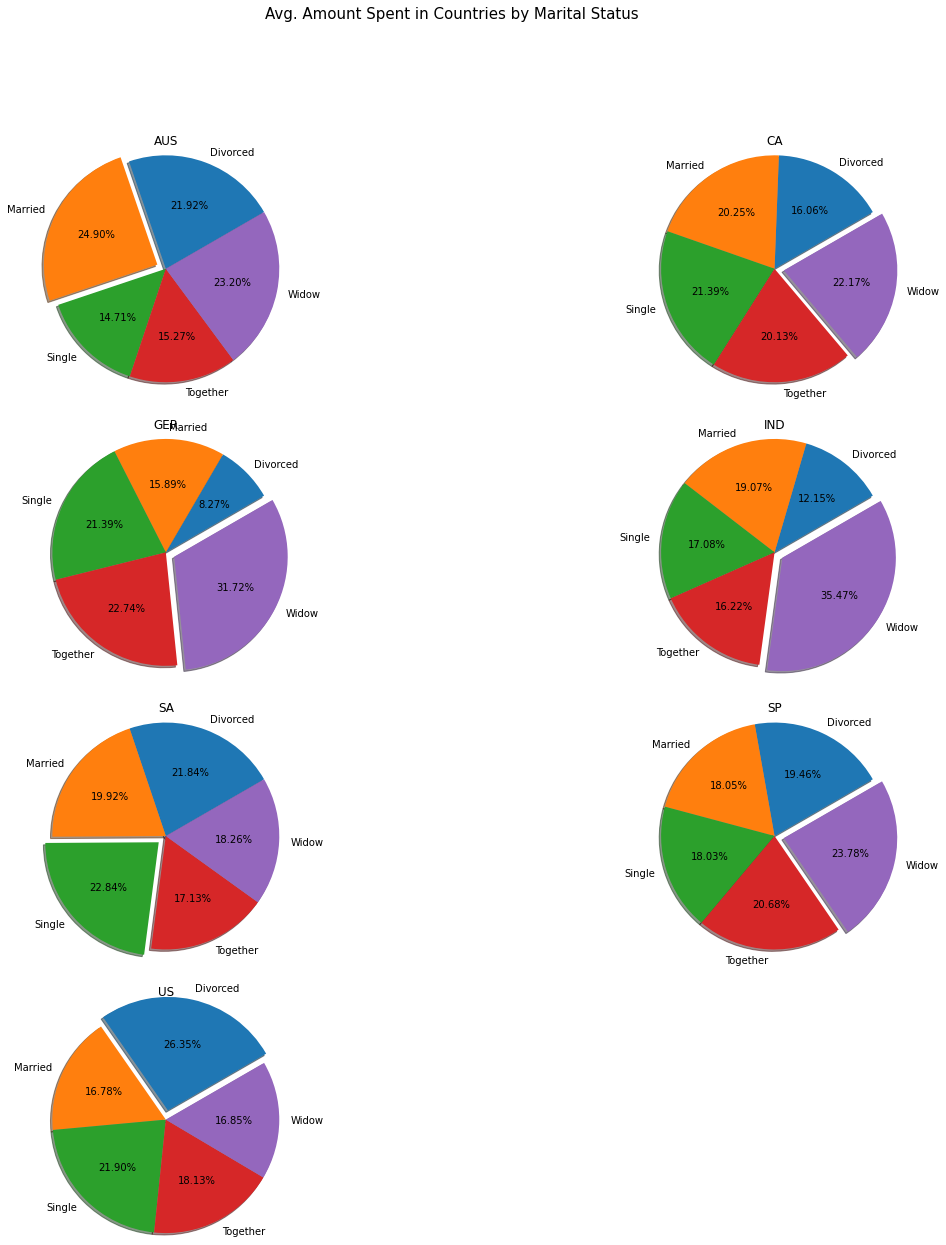

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (20, 20))

for i, (idx, row) in enumerate(data_cn.iterrows()):
    pct = row.values / np.sum(row) * 100
    ax = axes[i // 2, i % 2]
    ax.pie(row, labels = row.index, autopct = '%1.2f%%', radius = 1.2, textprops = {'fontsize': 10}, 
           shadow = True, explode = (pct == max(pct)) * 0.1, startangle = 30)
    ax.set_title(idx)

fig.delaxes(axes[3, 1])
plt.suptitle('Avg. Amount Spent in Countries by Marital Status', fontsize = 15)
plt.show()

In [ ]:
data_cn = pd.pivot_table(data = data_orig, index = 'Country', values = ['MntTotal'], 
                       columns = ['Education'], aggfunc = ['mean'])
data_cn = data_cn[data_cn.index != 'ME']
data_cn.columns = ['Basic', 'Graduation', 'Master', 'PhD', 'Undergraduate']
data_cn.T

Country,AUS,CA,GER,IND,SA,SP,US
Basic,301.888889,542.375000,392.200000,692.050000,518.750000,484.865979,543.857143
Graduation,60.500000,51.714286,66.000000,68.000000,50.166667,105.571429,50.666667
Master,589.600000,636.082707,673.186441,454.250000,678.575000,616.883212,651.968750
PhD,641.031250,631.469388,615.850000,501.190476,578.383333,637.783626,464.000000
Undergraduate,539.166667,720.218182,784.315789,779.192308,646.600000,653.064000,777.526316


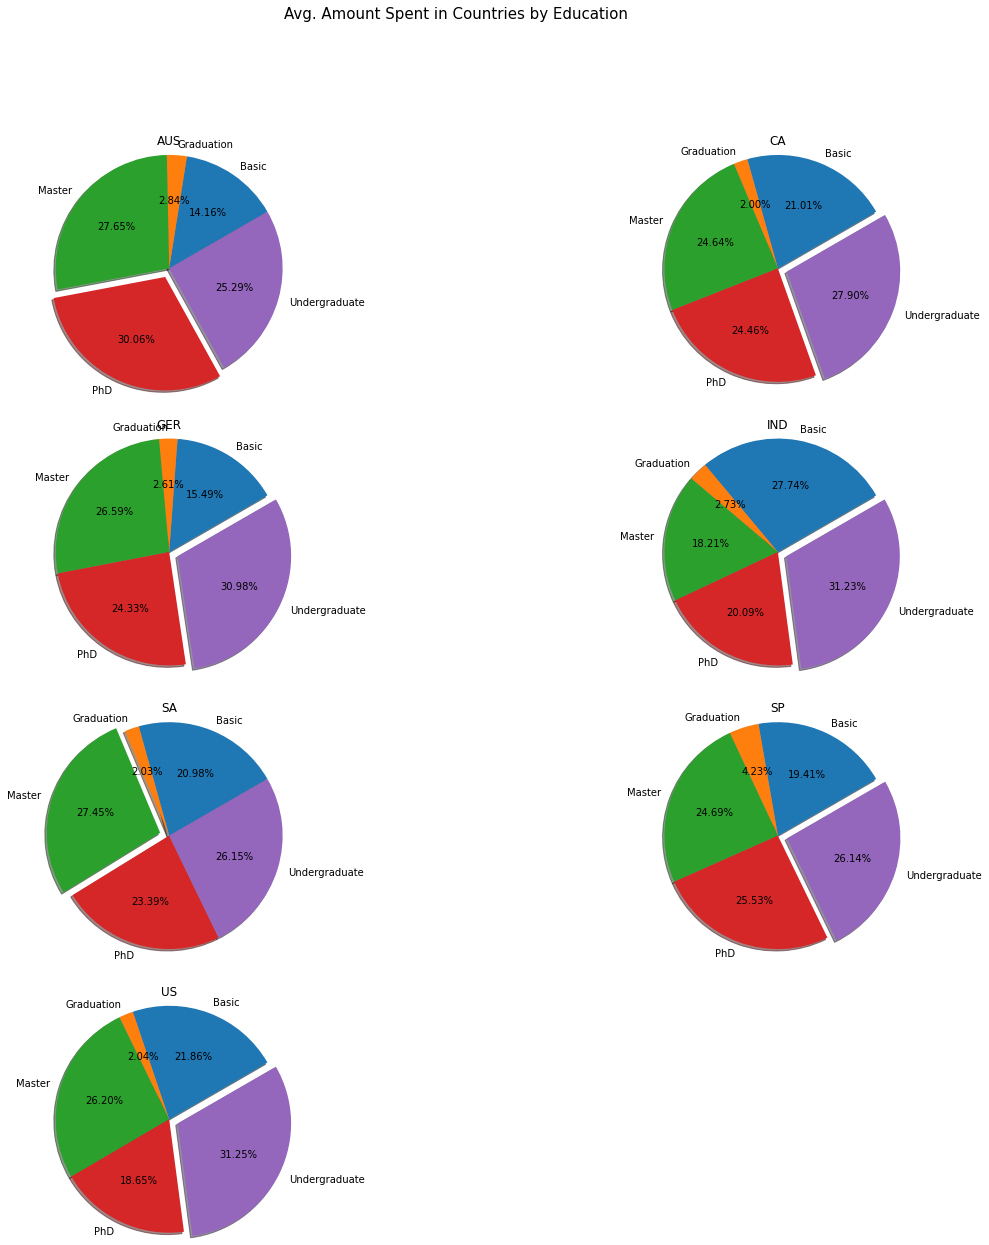

In [ ]:
fig, axes = plt.subplots(4, 2, figsize = (20, 20))

for i, (idx, row) in enumerate(data_cn.iterrows()):
    pct = row.values / np.sum(row) * 100
    ax = axes[i // 2, i % 2]
    ax.pie(row, labels = row.index, autopct = '%1.2f%%', radius = 1.2, textprops = {'fontsize': 10}, 
           shadow = True, explode = (pct == max(pct)) * 0.1, startangle = 30)
    ax.set_title(idx)

fig.delaxes(axes[3, 1])
plt.suptitle('Avg. Amount Spent in Countries by Education', fontsize = 15)
plt.show()

In [ ]:
data[['Income', 'Childrens', 'Num_TotalPurchases', 'Age',
    'MntTotal']].mean().round(1).to_frame(name = 'Average').style.background_gradient(sns.light_palette('#2ecc71', 
                                                                                                                 as_cmap = True))

,Average
Income,51966.100000
Childrens,1.000000
Num_TotalPurchases,12.500000
Age,52.100000
MntTotal,606.000000


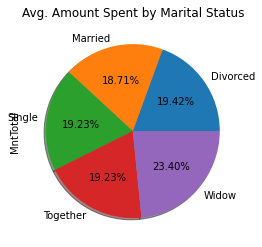

In [ ]:
data_orig.groupby(['Marital_Status'])['MntTotal'].agg('mean').plot.pie(autopct = '%1.2f%%', shadow = True)
plt.title('Avg. Amount Spent by Marital Status');

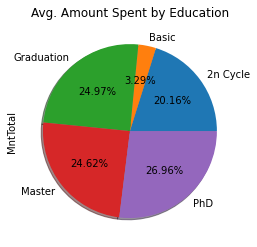

In [ ]:
data_orig.groupby(['Education'])['MntTotal'].agg('mean').plot.pie(autopct = '%1.2f%%', shadow = True)
plt.title('Avg. Amount Spent by Education');

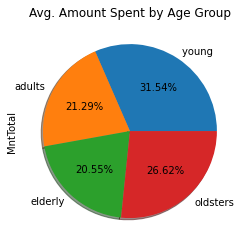

In [ ]:
data_orig.groupby(['AgeGroup'])['MntTotal'].agg('mean').plot.pie(autopct = '%1.2f%%', shadow = True)
plt.title('Avg. Amount Spent by Age Group');

Средний клиент этой компании:

Средний возраст 52 года

Средний доход $51966

Средний чек на покупку товаров $606

Клиенты с докторской степенью тратят больше всего, в то время как клиенты со степенью магистра и студенты тратят почти поровну